# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
#These libraries help with data manipulation and reading.
import numpy as np
import pandas as pd

# These Libraries help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# The goal of this library is to split the data into tests and trains.
from sklearn.model_selection import train_test_split

# Library for building linear regression_model
from sklearn.linear_model import LinearRegression

# Library to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Library to build linear regression_model using statsmodels
import statsmodels.api as sm

# Library to compute VIF for Multicolineary check
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [ ]:
#Connecting Google drive with Google colab
# Reading the data-set into Google colab
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reading the "used_device_data.csv" dataset into a dataframe (i.e.loading the data)
path="/content/drive/My Drive/used_device_data.csv"
data=pd.read_csv(path)

## Data Overview

These can be achieved by doing the following
- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  -Ensuring that the data is stored in the correct format, it's important to identify the data types.
  - Getting the statistical summary for the variables
  - Checking for missing values
 - Checking for duplicates
  
  



### Showing the first and last five rows of the dataset

In [ ]:
# returning the first 5 rows using the dataframe head method
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [ ]:
# returning the last 5 rows using dataframe tail method
data.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


### Checking the  dataset shape

In [ ]:
#checking shape of the dataframe to find out the number of rows and columns using the dataframe shape command
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

There are 3454 rows and 15 columns.


### Checking the columns data types for the dataset

In [ ]:
# Using the dataframe info() method to print a concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

**Observation**


*   The dataset contains 15 series (columns) of which nine of the series are of the float datatype (screen_size, main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight, normalized_used_price,  and normalized_new_price), two(2) of the series are of the integer datatype (release_year and days_used) and four(4) of the series are of the object datatype (brand_name, os, 4g, and 5g).

* Total memory usage is approximately 404.9 KB.





### Statistical summary of the dataset


In [ ]:
# checking the statistical summary of the data using describe command and transposing.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


**Observation**
*  The  size of phone screen ranges from 5.08 to 30.71 cm, with an average size around 13.71 cm and a standard deviation of 3.81 cm. The screen size of 75% of the phones are below 15.34cm. This indicates that most of the buyers of phones prefer screen sizes below 16 inches.

*  The  pixel of the phone main camera ranges from 0.08 to 48 mega pixels, with an average pixel around 9.48 megapixels  and a standard deviation of 4.82 megapixels. The pixel  of 75% of the phones are below 13.00. This indicates that most of the buyers of  phones buy phones with main camera pixel below 13.00 megapixels.

*  The  RAM of the phones ranges from 0.02 to 12 gb, with an average byte around 4.036gb  and a standard deviation of 1.37gb. The RAM  of 75% of the phones are below 4gb.

*  The  Weight of the phones ranges from 69 to 855 grams, with  average grams of  182.75grams  and a standard deviation of 88.41grams. The Weight  of 75% of the phones are below 185grams.


*  The  normalized price of used  phones ranges from 1.53 to 6.62 euros, with  average price of  4.36euros  and a standard deviation of 0.589 euros. 75% of the price of used phones are below 4.76 euros.

*  The  normalized price of new  phones ranges from 2.901 to 7.85 euros, with  average price of  5.23 euros  and a standard deviation of 0.68 euros. 75% of the price of new phones are below 5.67 euros.

### Checking for missing values

In [ ]:
# Checking for missing values
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

**Observation**
*  Six(6) of the series (main_camera_mp(179), selfie_camera_mp (2), int_memory (4), ram (4), battery(6), and weight(7)) contains missing values.

### Checking for duplicate values

In [ ]:
# checking for duplicates using duplicate method
duplicates =data.duplicated().value_counts()
duplicates

False    3454
dtype: int64

**Observation**
* There are no duplicate values in the dataset

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### Univariate Analysis

### Screen Size

In [ ]:
# Copying the data will ensure that it stays the same.
df = data.copy()

In [ ]:
# check screen_size
df['screen_size'].nunique()

142

In [ ]:
df['screen_size'].mode()

0    12.7
Name: screen_size, dtype: float64

**Observation**:
There 142 uniques screen sizes in the market

In [ ]:
from matplotlib import patches
import random
#creating a histogram and Boxplot using function

def histobox_plot(df, column, figsize=(15, 10), kde=False, bins=None):
    #plt.figure(figsize = (20,10))
    # set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
    sns.set(style="darkgrid")
    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)},figsize=figsize,)
    # assigning a graph to each ax
    sns.boxplot(df, x=column, ax=ax_box,showmeans=True, color="violet")
    sns.histplot(data=df, x=column, ax=ax_hist)
    ax_hist.axvline(
        data[column].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist.axvline(
        data[column].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')
    for p in ax_hist.patches:
      height = p.get_height() # get the height of each bar
      # adding text to each bar
      ax_hist.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
      y = height+0.2, # y-coordinate position of data label, padded 0.2 above bar
      s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
      ha = 'center') # sets horizontal alignment (ha) to center



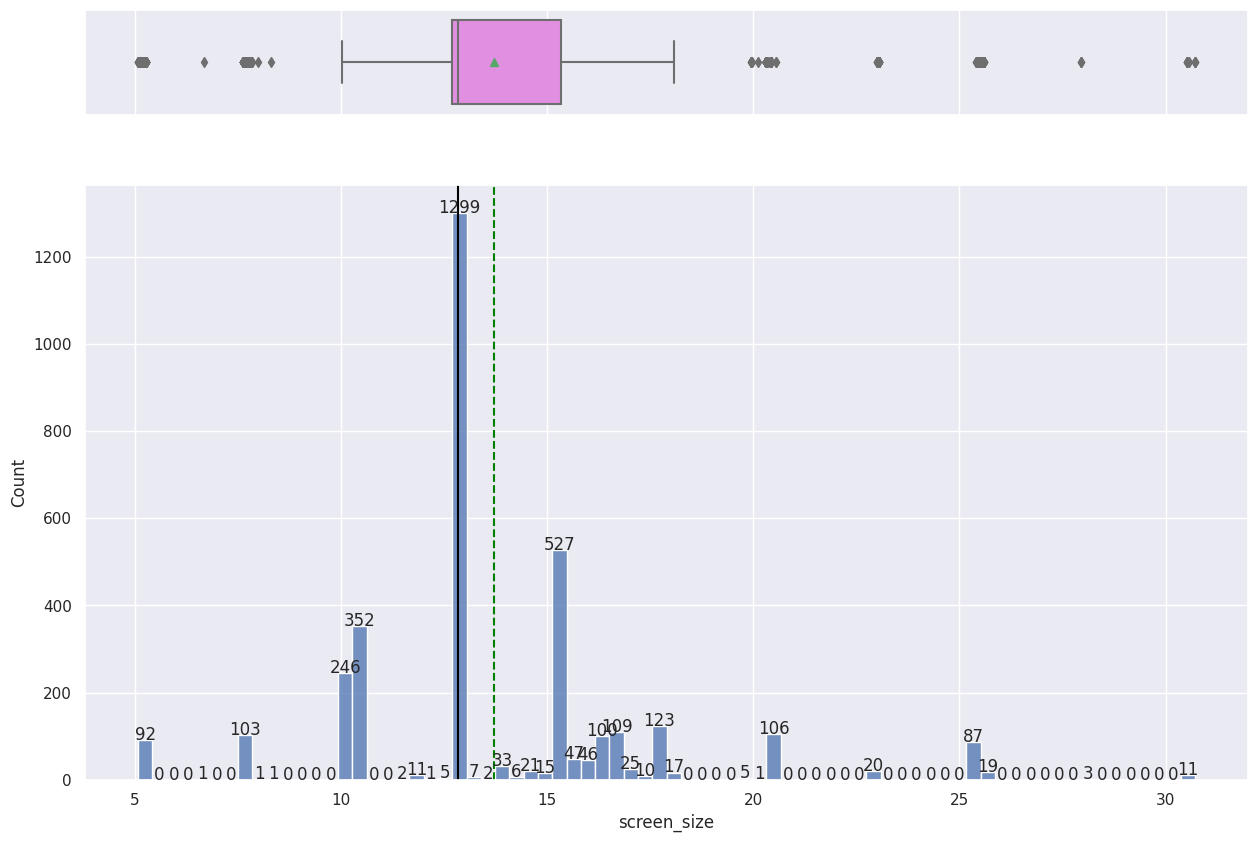

In [ ]:
histobox_plot(df,"screen_size")

**Observation**

* There are 142 unique screen sizes in the market.
* 50% of the screen sizes are below 12.83cm
* The average screen size is higher than the median indicating that the distribution is a bit right-skewed
* The most frequent screen size in the market is 12.7cm.
* There are outliers

**`normalized_used_price`**

In [ ]:
# check normalized_used_price
df['normalized_used_price'].nunique()


3094

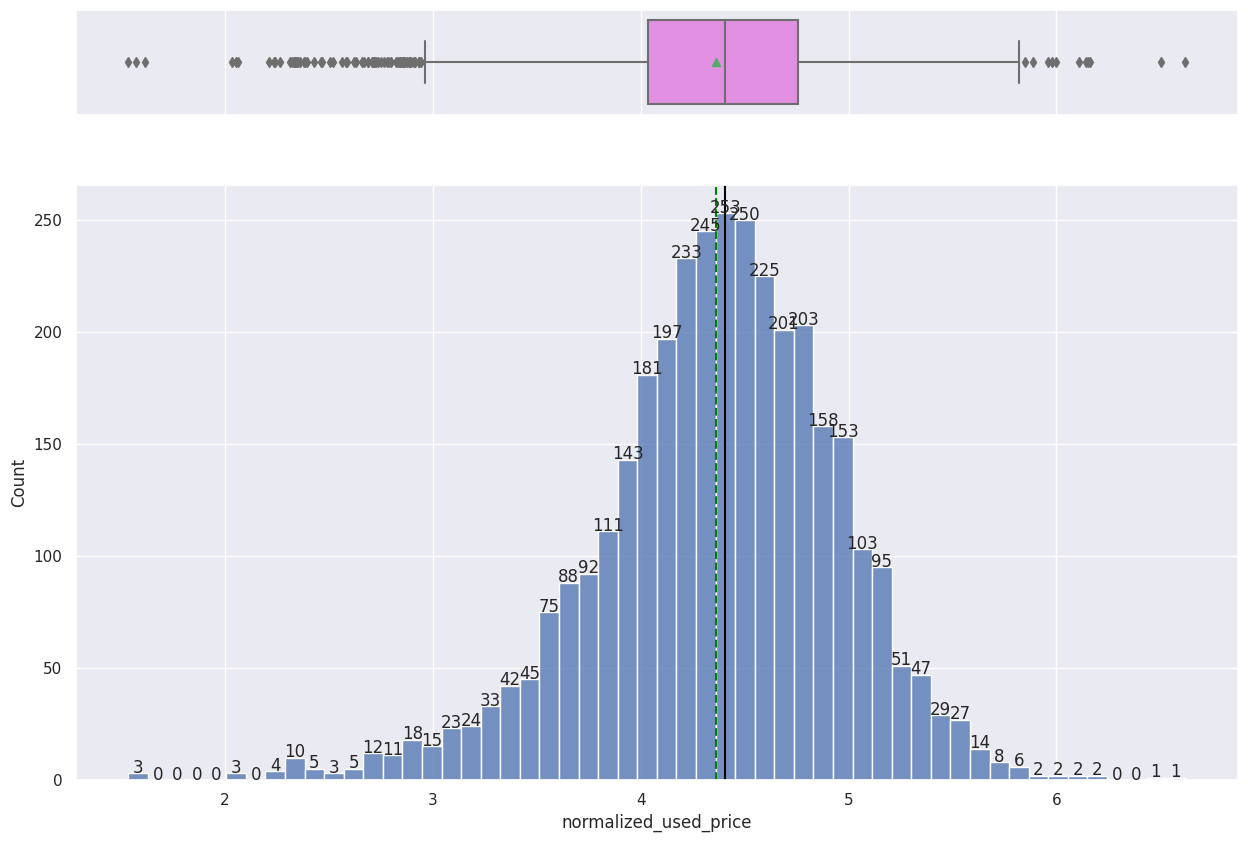

In [ ]:
histobox_plot(df, "normalized_used_price")

**Observation**
* There are 3094 unique normalized used prices in the market.
* 50% of the normalized used prices are below 4.41 euros
* The average normalized used prices is  approximately equal to the median indicating that the distribution is normally distributed
* The column contains outliers


**`normalized_new_price`**

In [ ]:
# check normalized_new_price
df['normalized_new_price'].nunique()



2988

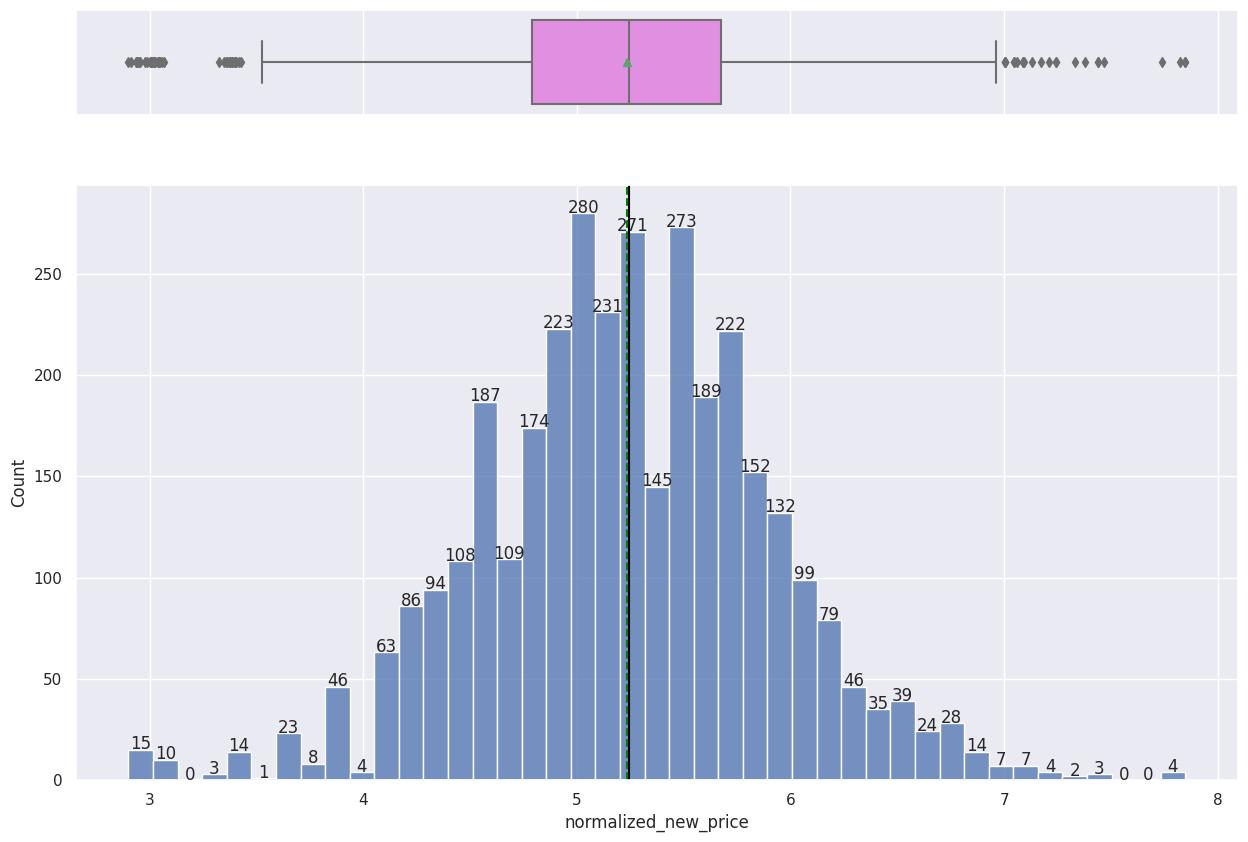

In [ ]:
histobox_plot(df, "normalized_new_price")

**Observation**

* There are 2988 unique normalized new prices in the market.
* 50% of the normalized new prices are below 5.25 euros
* The average normalized new prices is approximately equal to the median indicating that the distribution is normally distributed
* The column contains outliers


**`main_camera_mp`**

In [ ]:
# check
df['main_camera_mp'].nunique()



41

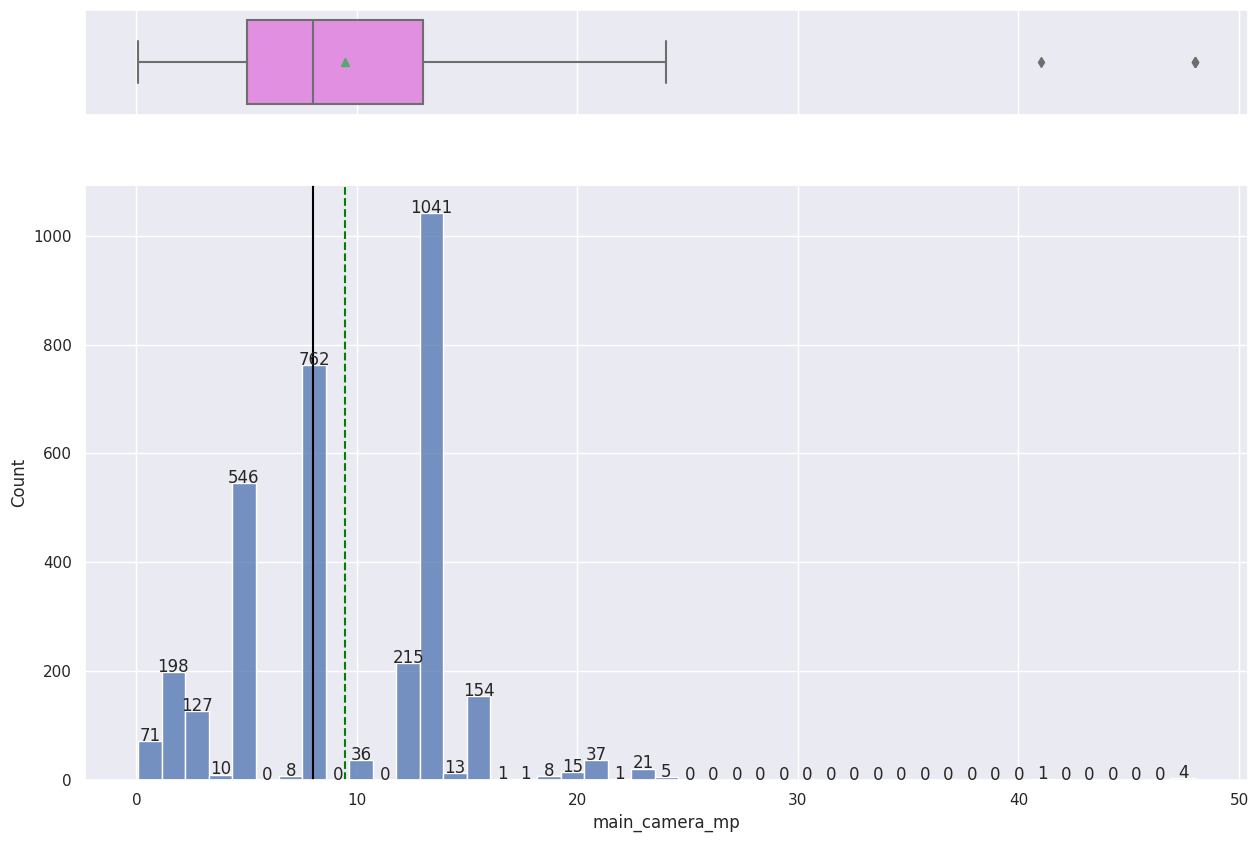

In [ ]:
histobox_plot(df, "main_camera_mp")

**Observation**

* There are 41 unique pixels of the main camera in the market.
* 50% of the main cameras are below 8.00 megapixels
* The average main camera is higher than the median indicating that the distribution is a bit right-skewed
* The column contains outliers


**`selfie_camera_mp`**

In [ ]:
# check selfie_camera_mp
df['selfie_camera_mp'].nunique()


37

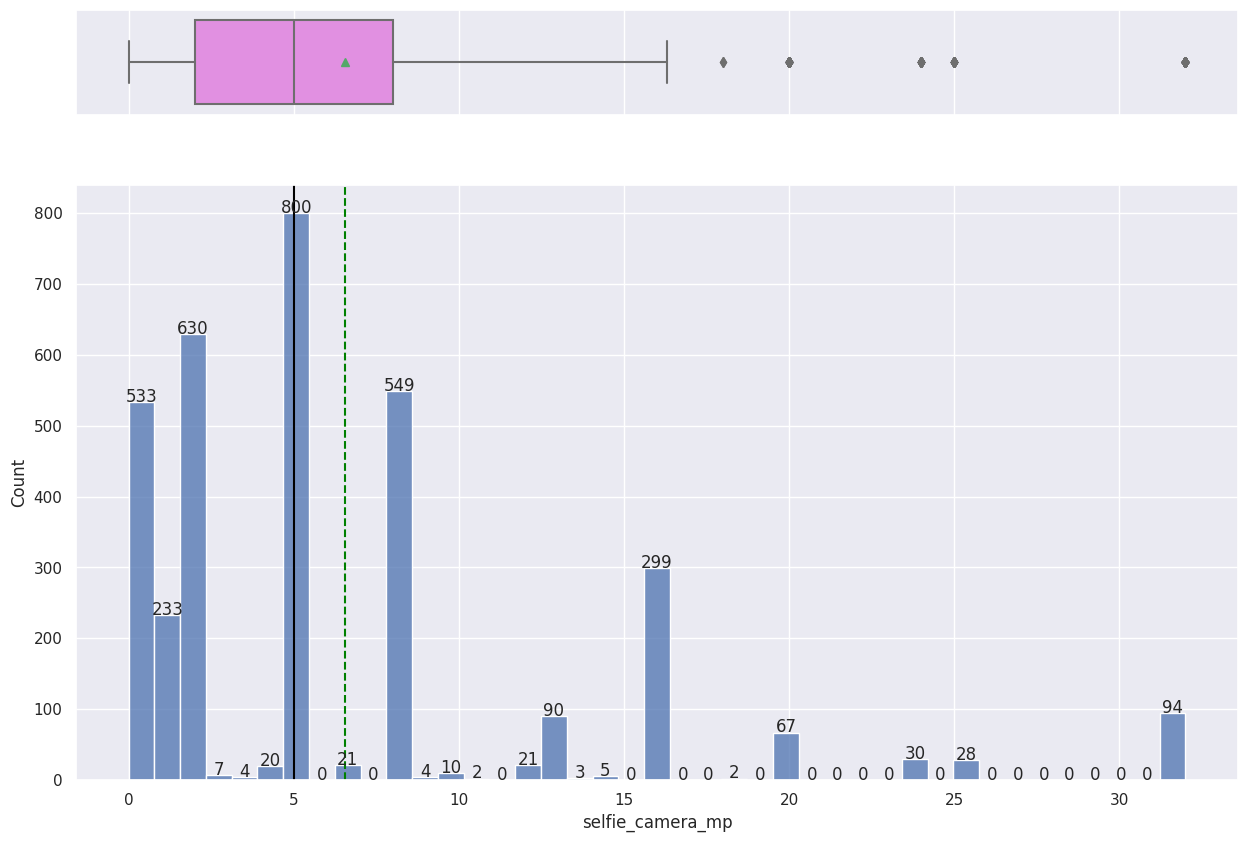

In [ ]:
histobox_plot(df, "selfie_camera_mp")

**Observation**

* There are 37 unique pixels of the selfie camera  in the market.
* 50% of the selfie cameras are below 5.00 megapixels
* The average selfie camera is higher than the median indicating that the distribution is a bit right-skewed
* The column contains outliers

**`int_memory`**

In [ ]:
# check
df['int_memory'].nunique()


15

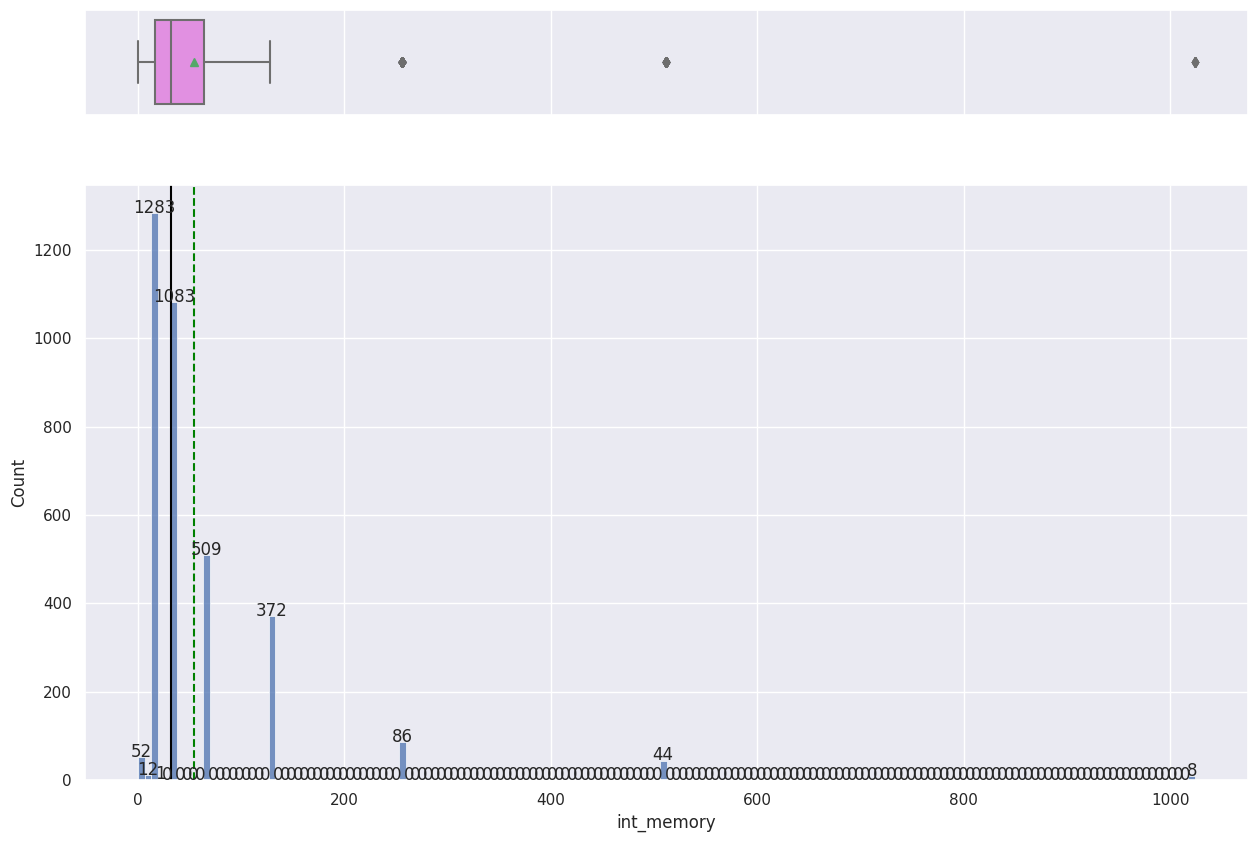

In [ ]:
histobox_plot(df, "int_memory")

**Observation**

* There are 15 unique internal memories in the market.
* 50% of the interna memories are below 32gb
* The average internal memory is higher than the median indicating that the distribution is a bit right-skewed
* There are outliers


**`ram`**

In [ ]:
# check ram
df['ram'].nunique()



12

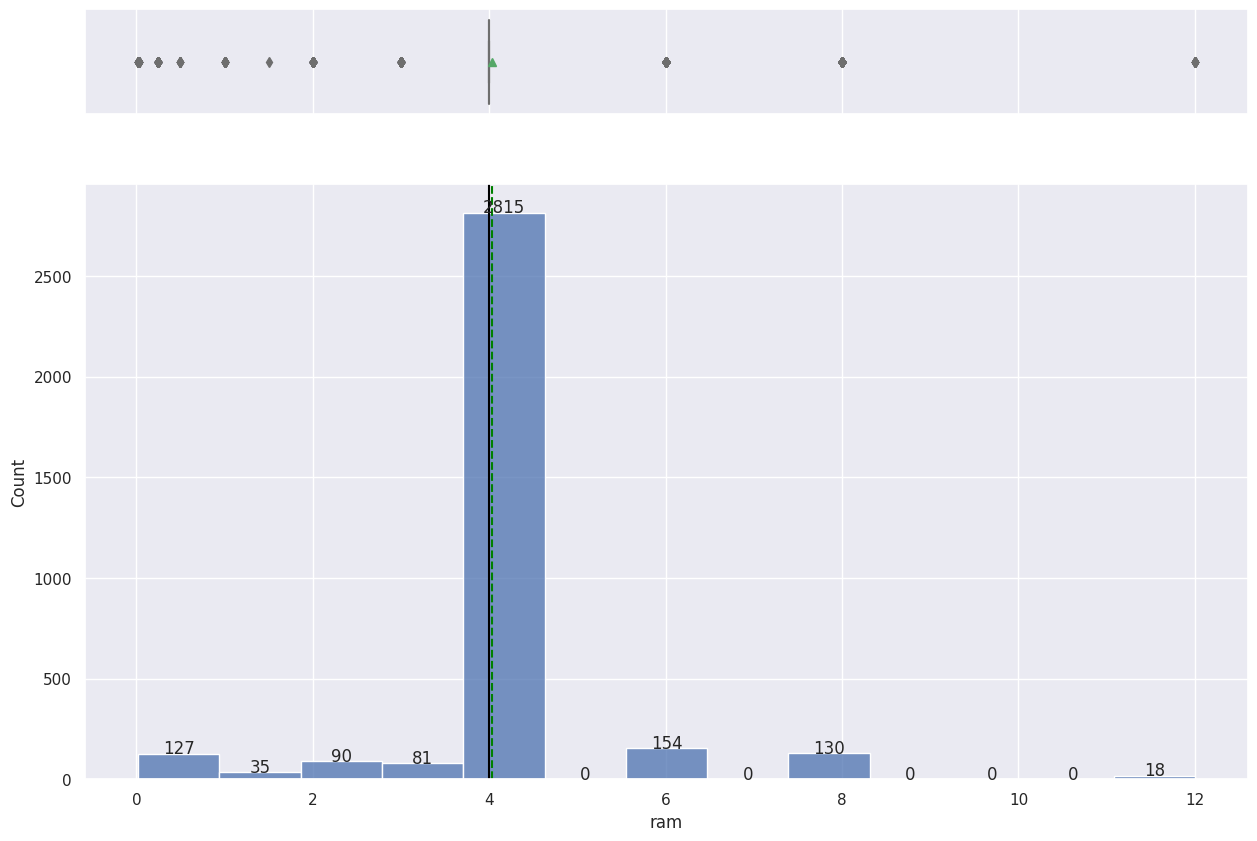

In [ ]:
histobox_plot(df, "ram")

**Observation**

* There are 15 unique RAMs in the market.
* 50% of the RAMs are below 4gb
* The average RAM is approximately equal to the median indicating that the distribution is normally distributed
* There are outliers


**`weight`**

In [ ]:
# check weight
df['weight'].nunique()


555

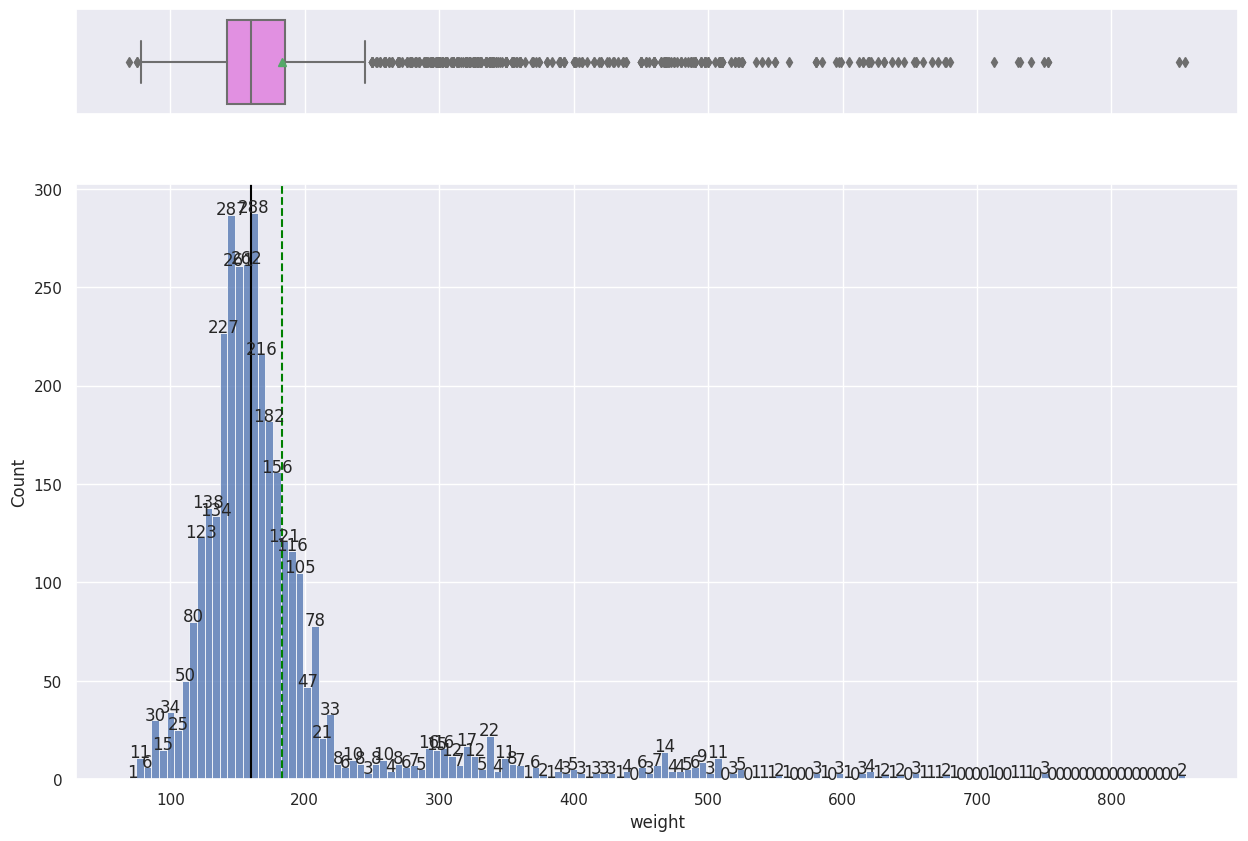

In [ ]:
histobox_plot(df, "weight")

**Observation**

* There are 555 unique phone weights in the market.
* 50% of the phone weights are below 160grams
* The average weight of phones is higher than the median indicating that the distribution is a bit right-skewed
* There are outliers


**`battery`**

In [ ]:
# check battery
df['battery'].nunique()


324

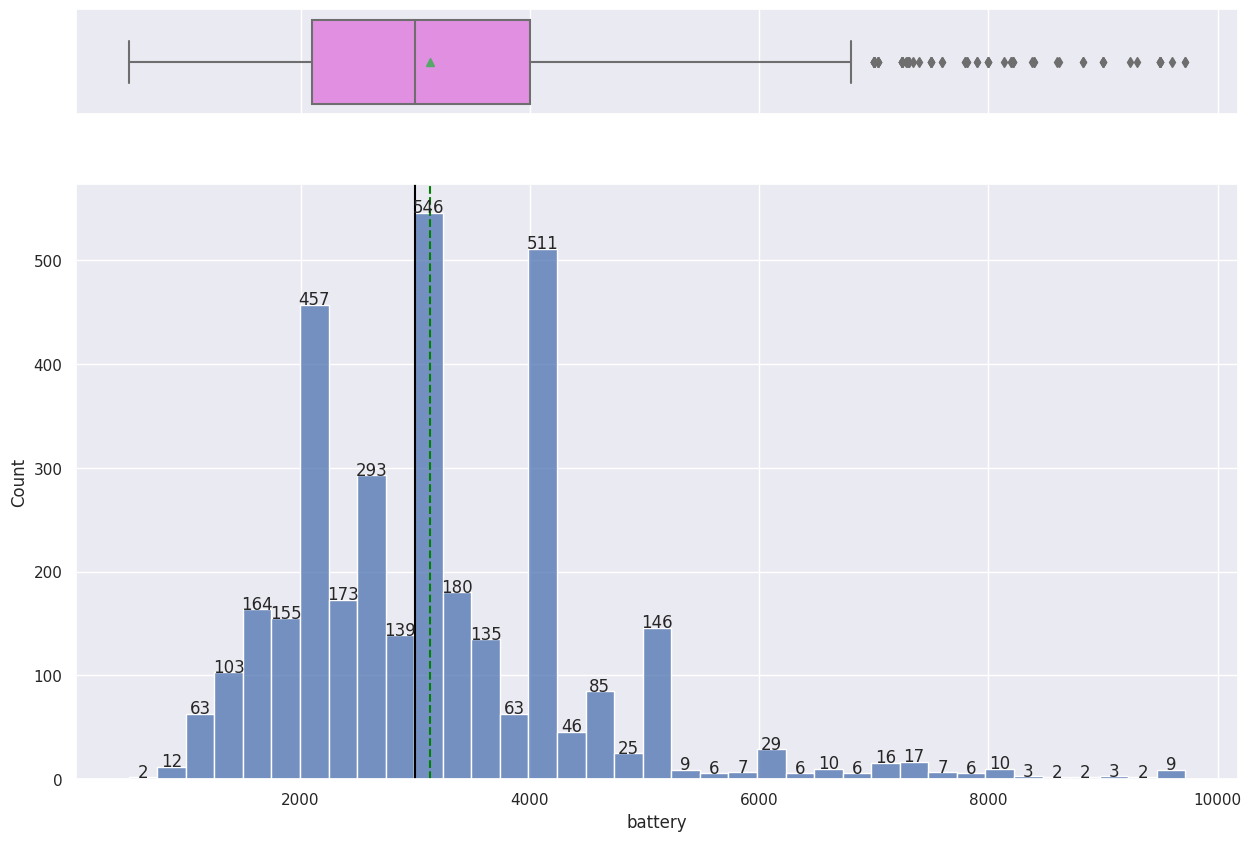

In [ ]:
histobox_plot(df, "battery")

**Observation**

* There are 324 unique battery capacity in the market.
* 50% of the battery capacity are below 3000MAh
* The average battery capacity is higher than the median indicating that the distribution is a bit right-skewed
* There are outliers


**`days_used`**

In [ ]:
# check days_used
df['days_used'].nunique()



924

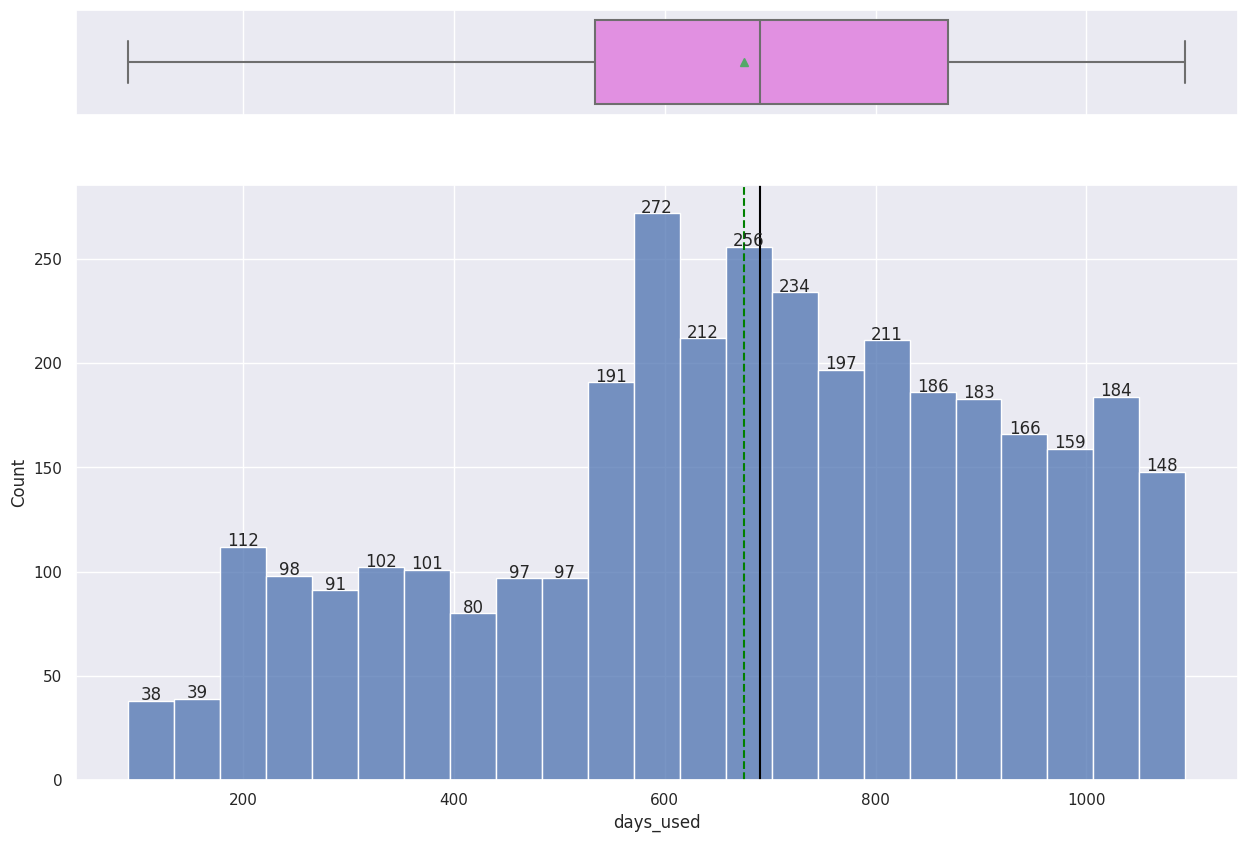

In [ ]:
histobox_plot(df, "days_used")

**Observation**

* 50% of the number of days the used/refurbished device has been used is below 690 days
* The average number of days the used/refurbished device has been used is lesser than the median indicating that the distribution is a bit left-skewed
* There are outliers



In [ ]:
# function to create barplots for automation


def barplot(data, column,perc=True):
  plt.figure(figsize=(10,5))
  bxp=sns.countplot(data=df,x=column)
  bxp.set_xlabel(column, fontsize=14)
  bxp.axes.set_title("Bar Chart Plot of "+ column.upper(), fontsize=16)
  plt.xticks(rotation=90)
  # label each bar in the countplot
  for p in bxp.patches:
    total = len(data[column])  # length of the column
    height = p.get_height()
    # get the height of each bar

    # percentage of each class of the category # get the height of each bar
    # adding text to each bar
    bxp.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+0.2, # y-coordinate position of data label, padded 0.2 above bar
    s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
    ha = 'center') # sets horizontal alignment (ha) to center
  for p in bxp.patches:
    total = len(data[column])  # length of the column
    height2 = 100 * p.get_height() / total
    # get the height of each bar

    # percentage of each class of the category # get the height of each bar
    # adding text to each bar
    bxp.text(x = p.get_x()+(p.get_width()), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height2+0.4, # y-coordinate position of data label, padded 0.2 above bar
    s = '{:.0f}'.format(height2)+"%", # data label, formatted to ignore decimals
    ha = 'left') # sets horizontal alignment (ha) to center

  plt.show()



**OS**

In [ ]:
# check os
df['os'].nunique()


4

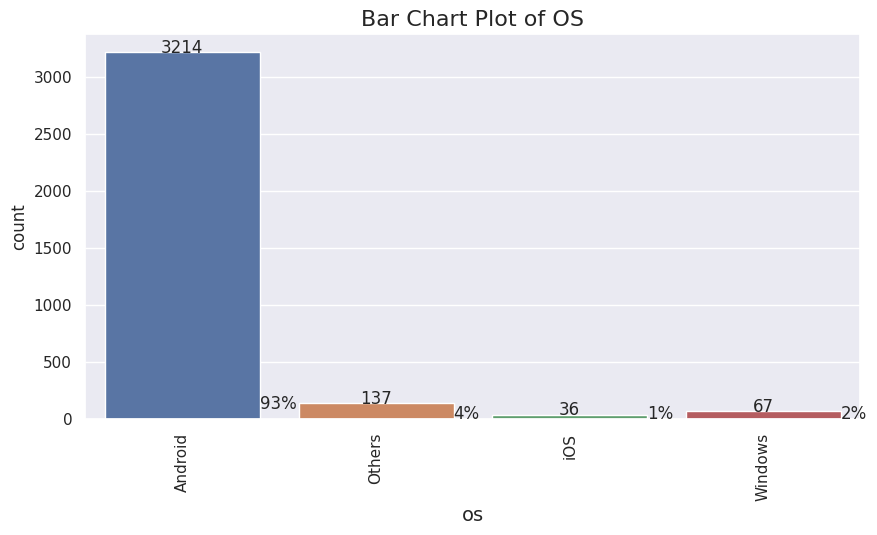

In [ ]:
barplot(df,"os")

#### Observations:

* There are 4 unique Operating system (OS) in the dataset.

* The distribution of OS types show that OS are not equally distributed.

* The most frequent OS type is the Android OS

* iOS appears to be the least OS type used by the phones.

**`brand_name`**

In [ ]:
# check brand_name
df['brand_name'].nunique()


34

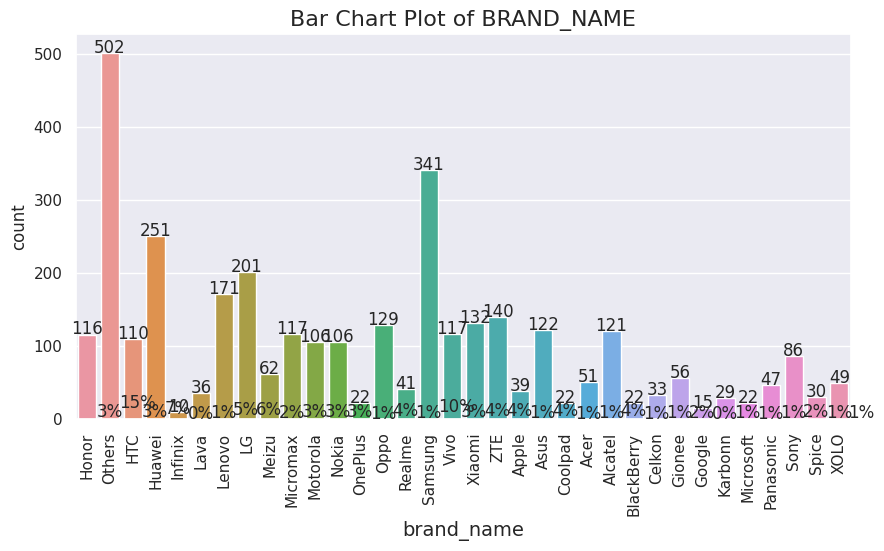

In [ ]:
barplot(df,"brand_name")

#### Observations:

* There are 34 unique Brand Names in the dataset.

* The distribution of Brand names show that Brand names are not equally distributed.

* The most frequent Brand names is Others followed by Samsung

* Infinix appears to be the least Brand name of the used phones.

**`4g`**

In [ ]:
# check 4g
df['4g'].nunique()


2

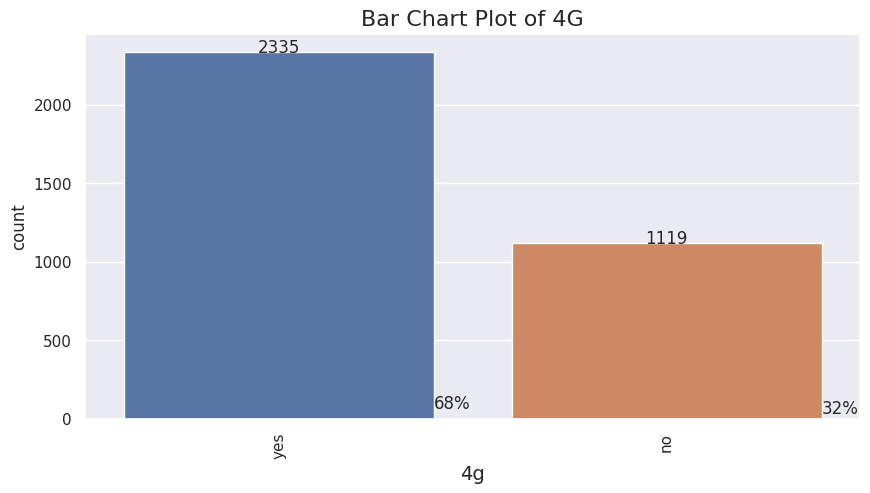

In [ ]:
barplot(df,"4g")

#### Observations:

* There are 2 unique values in the 4g column in the dataset.

* The distribution of phones with 4g and phones without 4g are not equally distributed.

* Majority of the phones 2335 (68%) has 4g available in the phone


**`5g`**

In [ ]:
# check 5g
df['5g'].nunique()


2

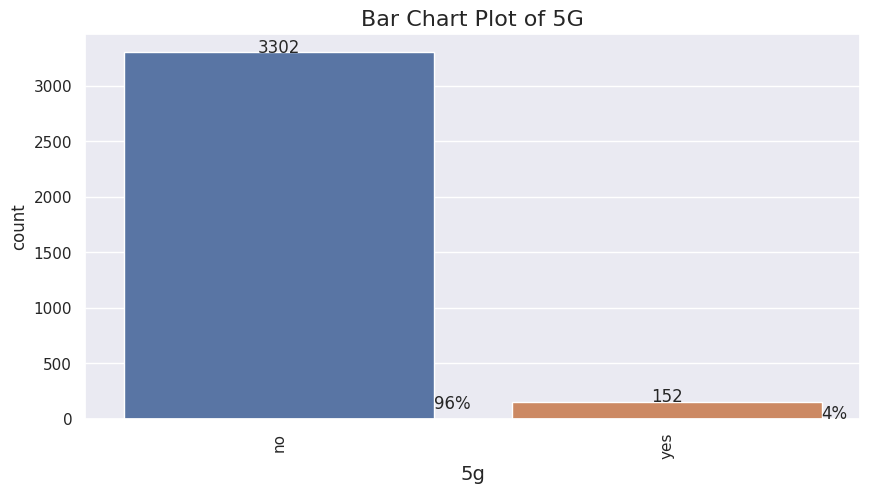

In [ ]:
barplot(df,"5g")

#### Observations:

* There are 2 unique values in the 5g column in the dataset.

* The distribution of phones with 5g and phones without 5g are not equally distributed.

* Majority of the phones 3302 (96%) has 5g available in the phone


**`release_year`**

In [ ]:
# check release_year
df['release_year'].nunique()


8

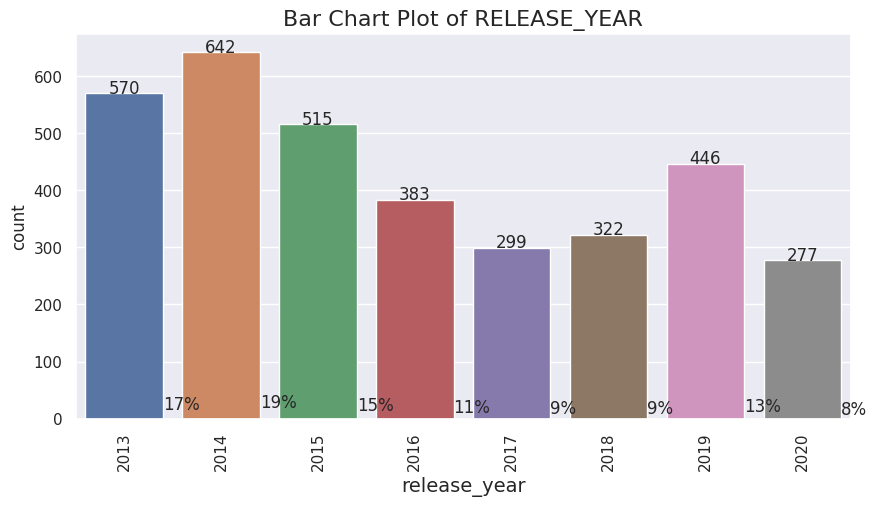

In [ ]:
barplot(df,"release_year")

#### Observations:

* There are 8 unique years in the dataset.

* The distribution of release years show that release years are not equally distributed.
* Most of the phones released were released in the year 2014(642 phones) follwed by 2013 (570 phones).


### Bivariate Analysis

**Checking Correlation between variables**

<ipython-input-157-3053f6181774>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax=sns.heatmap(newdf1.corr(),annot=True,cmap='Spectral',fmt=".2f", vmin=-1,vmax=1)


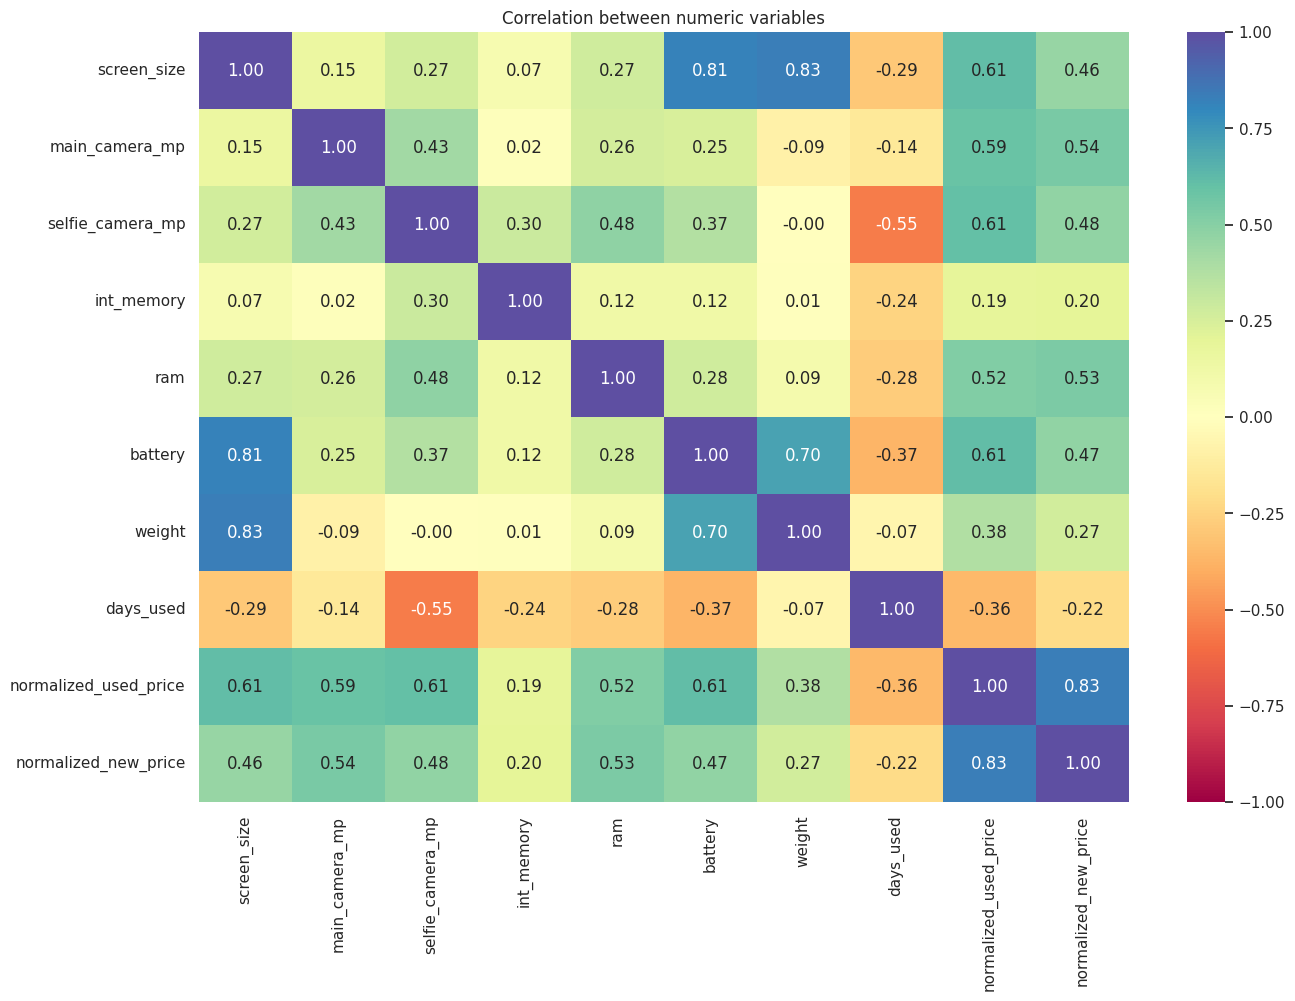

In [ ]:
plt.figure(figsize=(15,10))
# Remove column name 'release_year' since is time related
newdf1=df.drop(['release_year'], axis=1)
ax=sns.heatmap(newdf1.corr(),annot=True,cmap='Spectral',fmt=".2f", vmin=-1,vmax=1)
ax.set(title='Correlation between numeric variables')
plt.show()

**Observation**
*  Normalized used price is strongly correlated with main camera (r=0.59), ram(r=0.52), screen size (r=0.61) battery(r=0.61) and normalized new price (r=0.83)




**The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?**

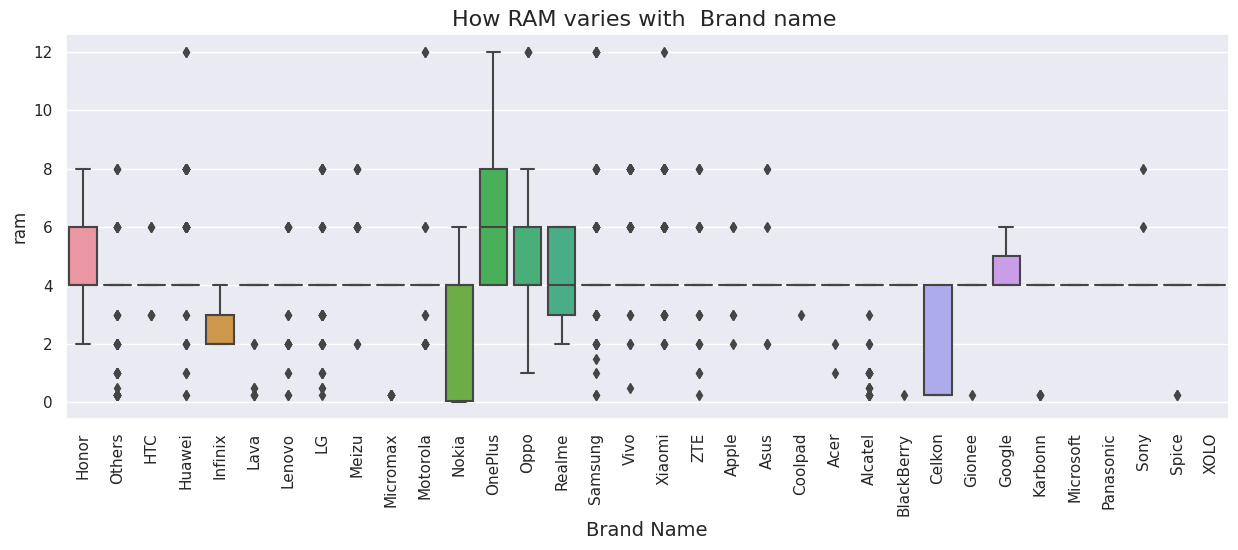

In [ ]:
plt.figure(figsize=(15,5))
bxp=sns.boxplot(data=df,x='brand_name', y='ram')
bxp.set_xlabel("Brand Name", fontsize=14)
bxp.axes.set_title("How RAM varies with  Brand name ", fontsize=16)
plt.xticks(rotation=90)
plt.show()

** Observation**
* The variation of RAM accross the different brand names is not equally distributed
*  Brands like the Celkon and Nokia phones has ram Below 4gb
*  Brand names like Google and OnePlus all has RAM above 4gb
*  OnePlus has 75% of its Phone RAM below 8gb
*  Honor has maximum of 8gb RAM and minimum of 2gb RAM

**A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?**

In [ ]:
#In this case, we'll create a new data frame for batteries that exceed 4500mAh.
largebattery = df[df.battery > 4500]
#The count of columns and rows that contain more than 4500mAh batteries is checked.
largebattery.shape

(341, 15)

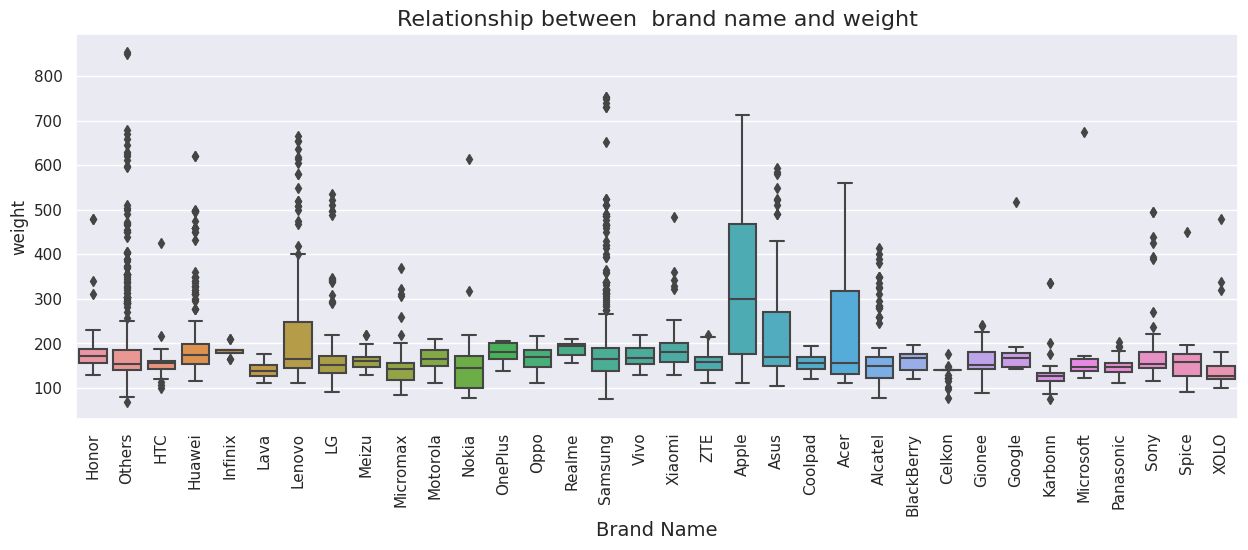

In [ ]:
plt.figure(figsize=(15,5))
bxp=sns.boxplot(data=df,x='brand_name', y='weight')
bxp.set_xlabel("Brand Name", fontsize=14)
bxp.axes.set_title("Relationship between  brand name and weight", fontsize=16)
plt.xticks(rotation=90)
plt.show()

**observation**
* The variation of weight for phones and tablets offering large batteries (more than 4500 mAh) is not equally distributed
*  Among the brand names with battery above 4500mAh, Apple has the highest weight.
*  Karbon is one of the brand of phones with the least weight that has battery above 4500mAh


**Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?**

In [ ]:
largescreen = df[df.screen_size > 6 * 2.54]
largescreen.shape

(1099, 15)

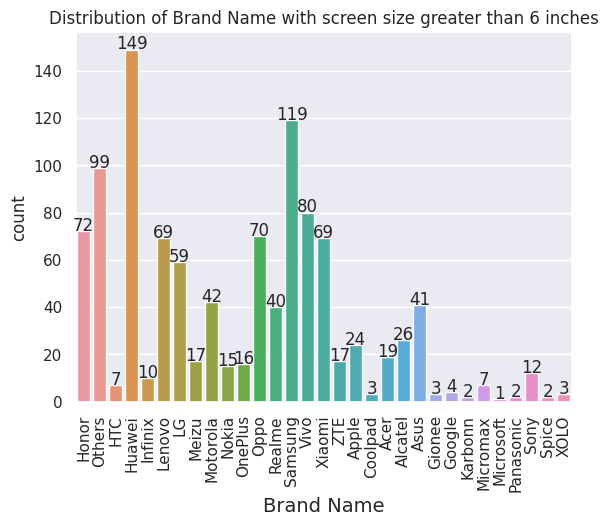

In [ ]:
ax=sns.countplot(data = largescreen, x = 'brand_name')
plt.xticks(rotation=90)
ax.set(title='Distribution of Brand Name with screen size greater than 6 inches')
ax.set_xlabel("Brand Name", fontsize=14)
# label each bar in the countplot
for p in ax.patches:
 height = p.get_height() # get the height of each bar
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+0.2, # y-coordinate position of data label, padded 0.2 above bar
 s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center') # sets horizontal alignment (ha) to center

**Observation**

*  There are 1099 phones and tablets are available across different brands with a screen size larger than 6 inches.
*  Huawei has the highest number of phones and tablet with screen size larger than 6 inches followed by samsung.

**A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?**

In [ ]:
selfiecamera = df[df.selfie_camera_mp > 8]
selfiecamera.shape

(655, 15)

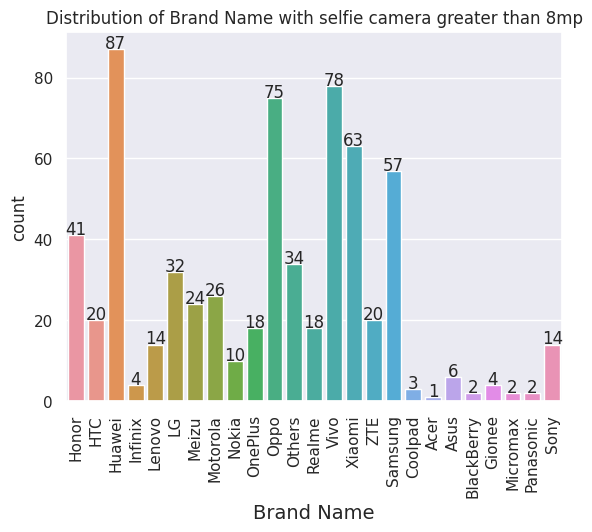

In [ ]:
ax=sns.countplot(data = selfiecamera, x = 'brand_name')
plt.xticks(rotation=90)
ax.set(title='Distribution of Brand Name with selfie camera greater than 8mp')
ax.set_xlabel("Brand Name", fontsize=14)
# label each bar in the countplot
for p in ax.patches:
 height = p.get_height() # get the height of each bar
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+0.2, # y-coordinate position of data label, padded 0.2 above bar
 s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center') # sets horizontal alignment (ha) to center

**observation**
* The distribution of devices offering greater than 8MP selfie cameras across brands is not equally distributed.
*  Huawei has the highest number of of devices offering greater than 8MP selfie cameras followed by Vivo.

In [ ]:
#for back camera we set to 16mp
backcamera = df[df.main_camera_mp > 16]
backcamera.shape

(94, 15)

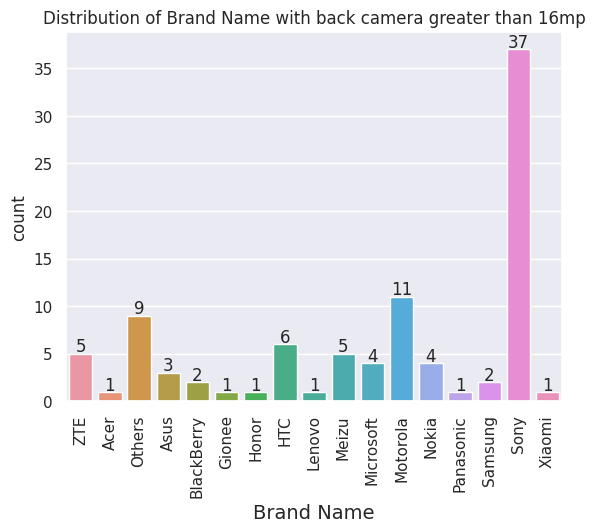

In [ ]:
ax=sns.countplot(data = backcamera, x = 'brand_name')
plt.xticks(rotation=90)
ax.set(title='Distribution of Brand Name with back camera greater than 16mp')
ax.set_xlabel("Brand Name", fontsize=14)
# label each bar in the countplot
for p in ax.patches:
 height = p.get_height() # get the height of each bar
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+0.2, # y-coordinate position of data label, padded 0.2 above bar
 s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center') # sets horizontal alignment (ha) to center

**observation**
* The distribution of devices offering greater than 16MP main cameras across brands is not equally distributed.
*  Sony has the highest number of of devices offering greater than 16MP main cameras followed by Motorola.

**Variation of price of used devices across the years.**

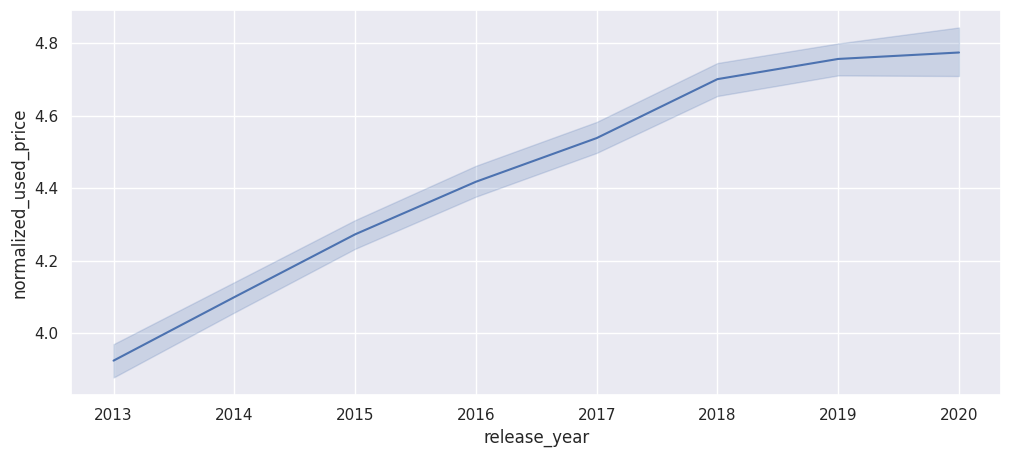

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(df,y="normalized_used_price",x="release_year")
plt.show()

**observation**
* There is a linear variation of the price of used/refurbished devices accross the years. The line plot above shows that as the year advances the  normalized price of used devices increases.

**The variations in the prices of used tablets and phones that support 5G and 4G networks.**

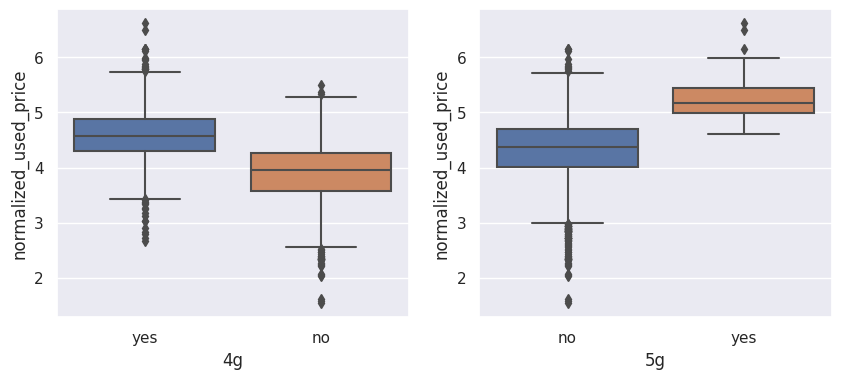

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

**observation**
*  Price of phones with 5g network are higher than price of phones with 4g network

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**Missing value treatment**

In [ ]:
#copying df dataframe to create another dataframe
newdf = df.copy()

In [ ]:
# Checking for missing values
newdf.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    newdf[col] = newdf[col].fillna(
        value=newdf.groupby(['release_year','brand_name'])[col].transform("median")
    )

# checking for missing values
newdf.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    newdf[col] = newdf[col].fillna(
        value=newdf.groupby(['brand_name'])[col].transform("median")
    )
# checking for missing values
newdf.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [ ]:
newdf["main_camera_mp"] = newdf["main_camera_mp"].fillna(newdf["main_camera_mp"].median())

# checking for missing values
newdf.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [ ]:

#Rechecking the columns datatype using .info() method)
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3454 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

## EDA

- It is a good idea to explore the data once again after manipulating it.

### Checking for Outliers


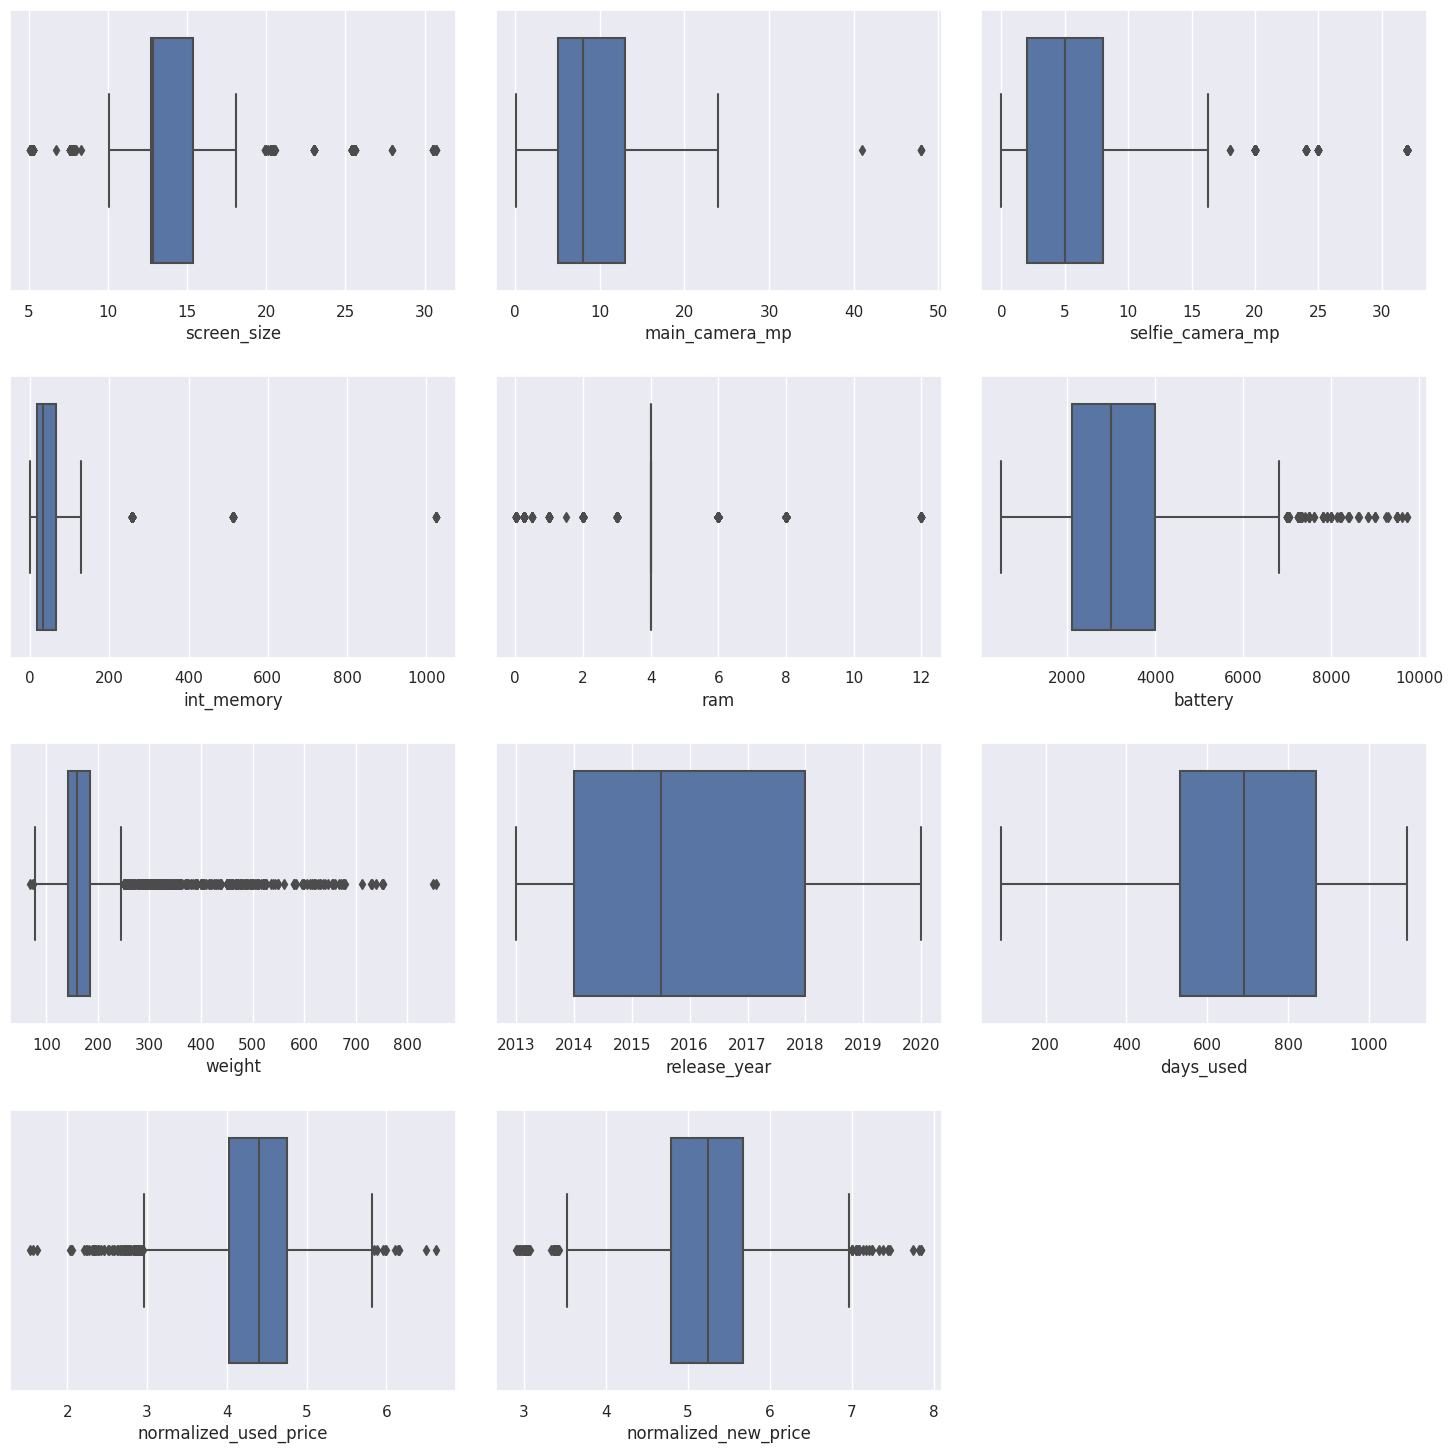

In [ ]:
# outlier detection using boxplot
num_cols = newdf.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=newdf, x=variable)
    plt.tight_layout(pad=2)

plt.show()

## Model Building - Linear Regression

In [ ]:
# independent variables
X = newdf.drop(["normalized_used_price"], axis=1)
# dependent variable
y = newdf[["normalized_used_price"]]

In [ ]:
print(X.head())


  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_new_price  
0        127              4.715100  
1        325              5.519018  
2        162              5.884631  
3        345              5.630961  
4  

In [ ]:

print(y.head())

   normalized_used_price
0               4.307572
1               5.162097
2               5.111084
3               5.135387
4               4.389995


In [ ]:
# let's add the intercept to data
X = sm.add_constant(X)

In [ ]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
newdf['main_camera_mp'].unique()

array([13.  ,  8.  ,  5.  , 10.5 ,  3.15,  2.  , 16.  ,  0.3 , 12.  ,
       14.5 , 48.  ,  3.  , 21.  ,  1.3 , 13.1 , 24.  ,  0.08, 20.7 ,
       23.  ,  1.  , 18.  , 12.2 , 12.3 , 20.  , 20.2 ,  4.  , 12.5 ,
       10.  ,  6.5 ,  6.7 , 41.  , 20.1 , 12.6 , 16.3 , 22.6 , 19.  ,
       21.5 , 21.2 ,  8.1 ,  1.2 , 22.5 ])

## Split Data

**We will now split X and y into train and test sets in a 70:30 ratio.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [ ]:
print(X_train.shape[0])#Number of rows in train data

2417


In [ ]:
print(X_test.shape[0])#Number of rows in test data

1037


## Fit Linear Model

In [ ]:
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()

In [ ]:
# let's print the regression summary
print(olsres.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                           21:23:54   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


## Model Performance Check

Let's check the performance of the model using different metrics.

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:

# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsres, X_train, y_train)
olsmodel_train_perf

Training Performance



/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,NaN


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_train_perf = model_performance_regression(olsres, X_test, y_test)
olsmodel1_train_perf

Test Performance



/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,NaN


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### Test for Multicolinearity

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient $\beta_k$ is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model.

* **General Rule of Thumb**:

    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence, the variance of $\beta_k$ is not inflated at all.
    - If VIF exceeds 5, we say there is moderate VIF, and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.
    - The purpose of the analysis should dictate which threshold to use.

In [ ]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                    3.791593e+06
screen_size              7.677290e+00
main_camera_mp           2.285051e+00
selfie_camera_mp         2.812473e+00
int_memory               1.364152e+00
ram                      2.282352e+00
battery                  4.081780e+00
weight                   6.396749e+00
release_year             4.899007e+00
days_used                2.660269e+00
normalized_new_price     3.119430e+00
brand_name_Alcatel       3.405693e+00
brand_name_Apple         1.305767e+01
brand_name_Asus          3.332038e+00
brand_name_BlackBerry    1.632378e+00
brand_name_Celkon        1.774721e+00
brand_name_Coolpad       1.468006e+00
brand_name_Gionee        1.951272e+00
brand_name_Google        1.321778e+00
brand_name_HTC           3.410361e+00
brand_name_Honor         3.340687e+00
brand_name_Huawei        5.983852e+00
brand_name_Infinix       1.283955e+00
brand_name_Karbonn       1.573702e+00
brand_name_LG            4.849832e+00
brand_name_Lava          1.711360e+0

#### Let's remove/drop multicollinear columns one by one and observe the effect on our predictive model.

In [ ]:
X_train2 = X_train.drop(["brand_name_Apple"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.845 
Adjusted R-squared: 0.842


**Since there is no effect on adj. R-squared after dropping the 'brand_name_Apple' column, we can remove it from the training set.**

In [ ]:
X_train = X_train.drop(["brand_name_Apple"], axis=1)

In [ ]:
olsmod_2 = sm.OLS(y_train, X_train)
olsres_2 = olsmod_2.fit()
print(olsres_2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     274.5
Date:                   Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                           21:23:54   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -151.7
Df Residuals:                       2369   BIC:                             126.2
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Checking if multicollinearity is still present in the data.

In [ ]:
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                    3.784965e+06
screen_size              7.643583e+00
main_camera_mp           2.284429e+00
selfie_camera_mp         2.791121e+00
int_memory               1.364138e+00
ram                      2.273686e+00
battery                  4.079720e+00
weight                   6.394014e+00
release_year             4.890322e+00
days_used                2.659799e+00
normalized_new_price     3.102417e+00
brand_name_Alcatel       3.230773e+00
brand_name_Asus          3.145077e+00
brand_name_BlackBerry    1.561121e+00
brand_name_Celkon        1.731854e+00
brand_name_Coolpad       1.436852e+00
brand_name_Gionee        1.886381e+00
brand_name_Google        1.293163e+00
brand_name_HTC           3.240658e+00
brand_name_Honor         3.160024e+00
brand_name_Huawei        5.581714e+00
brand_name_Infinix       1.265587e+00
brand_name_Karbonn       1.544264e+00
brand_name_LG            4.565534e+00
brand_name_Lava          1.670810e+00
brand_name_Lenovo        4.291839e+0

In [ ]:
X_train3 = X_train.drop(["brand_name_Huawei"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train3)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.845 
Adjusted R-squared: 0.842


**Since there is no effect on adj. R-squared after dropping the 'brand_name_Huawei' column, we can remove it from the training set.**

In [ ]:
X_train = X_train.drop(["brand_name_Huawei"], axis=1)

In [ ]:
olsmod_3 = sm.OLS(y_train, X_train)
olsres_3 = olsmod_3.fit()
print(olsres_3.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     280.6
Date:                   Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                           21:23:55   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -153.7
Df Residuals:                       2370   BIC:                             118.4
Df Model:                             46                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Checking if multicollinearity is still present in the data.

In [ ]:
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series3))

VIF values: 

const                    3.784965e+06
screen_size              7.631172e+00
main_camera_mp           2.284069e+00
selfie_camera_mp         2.780909e+00
int_memory               1.362495e+00
ram                      2.272754e+00
battery                  4.079196e+00
weight                   6.393234e+00
release_year             4.890240e+00
days_used                2.659317e+00
normalized_new_price     3.102129e+00
brand_name_Alcatel       1.434036e+00
brand_name_Asus          1.367355e+00
brand_name_BlackBerry    1.158290e+00
brand_name_Celkon        1.257428e+00
brand_name_Coolpad       1.080731e+00
brand_name_Gionee        1.169453e+00
brand_name_Google        1.059218e+00
brand_name_HTC           1.400717e+00
brand_name_Honor         1.356413e+00
brand_name_Infinix       1.070724e+00
brand_name_Karbonn       1.137121e+00
brand_name_LG            1.611822e+00
brand_name_Lava          1.145103e+00
brand_name_Lenovo        1.563553e+00
brand_name_Meizu         1.184730e+0

In [ ]:
X_train4 = X_train.drop(["screen_size"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train4)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.842 
Adjusted R-squared: 0.838


In [ ]:

X_train = X_train.drop(["screen_size"], axis=1)
olsmod_4 = sm.OLS(y_train, X_train)
olsres_4 = olsmod_4.fit()
print(olsres_4.summary())


                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     279.7
Date:                   Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                           21:23:55   Log-Likelihood:                 97.795
No. Observations:                   2417   AIC:                            -103.6
Df Residuals:                       2371   BIC:                             162.8
Df Model:                             45                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [ ]:
vif_series4 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series4))


VIF values: 

const                    3.653032e+06
main_camera_mp           2.280732e+00
selfie_camera_mp         2.778862e+00
int_memory               1.360243e+00
ram                      2.272721e+00
battery                  3.836906e+00
weight                   2.986783e+00
release_year             4.715694e+00
days_used                2.647789e+00
normalized_new_price     3.056174e+00
brand_name_Alcatel       1.432521e+00
brand_name_Asus          1.365026e+00
brand_name_BlackBerry    1.157460e+00
brand_name_Celkon        1.257428e+00
brand_name_Coolpad       1.080709e+00
brand_name_Gionee        1.162687e+00
brand_name_Google        1.057511e+00
brand_name_HTC           1.395112e+00
brand_name_Honor         1.354459e+00
brand_name_Infinix       1.070581e+00
brand_name_Karbonn       1.136293e+00
brand_name_LG            1.602220e+00
brand_name_Lava          1.145103e+00
brand_name_Lenovo        1.561975e+00
brand_name_Meizu         1.183306e+00
brand_name_Micromax      1.478818e+0

### Now that we do not have multicollinearity in our data, the p-values of the coefficients have become reliable and we can remove the non-significant predictor variables.

In [ ]:
# initial list of columns
predictors = X_train.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'release_year', 'normalized_new_price', 'brand_name_Karbonn', 'brand_name_Lenovo', 'brand_name_Xiaomi', 'os_Others', '4g_yes', '5g_yes']


The selected columns are: 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'release_year', 'normalized_new_price', 'brand_name_Karbonn', 'brand_name_Lenovo', 'brand_name_Xiaomi', 'os_Others', '4g_yes', '5g_yes']

In [ ]:
x_train3 = X_train[selected_features]

In [ ]:
olsmod_77 = sm.OLS(y_train, x_train3)
olsres_77 = olsmod_77.fit()
print(olsres_77.summary())


                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1042.
Date:                   Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                           21:23:55   Log-Likelihood:                 77.391
No. Observations:                   2417   AIC:                            -128.8
Df Residuals:                       2404   BIC:                            -53.51
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

**After dropping the features causing strong multicollinearity and the statistically insignificant ones, our model performance hasn't dropped sharply (adj. R-squared has dropped from 0.842 to 0.838). This shows that these variables did not have much predictive power.**

**Test for linearity**

In [ ]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_77.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_77.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,4.087488,3.861054,0.226434
1,4.448399,4.640047,-0.191648
2,4.315353,4.280218,0.035134
3,4.282068,4.184118,0.097950
4,4.456438,4.485998,-0.029560


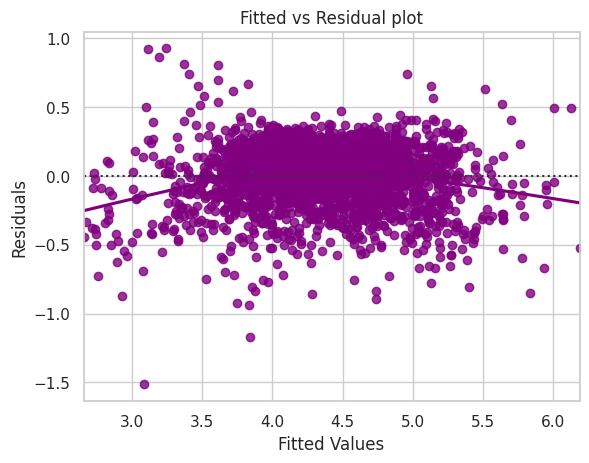

In [ ]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

**observation**
*  The residuals have no pattern, meaning that the data is linear

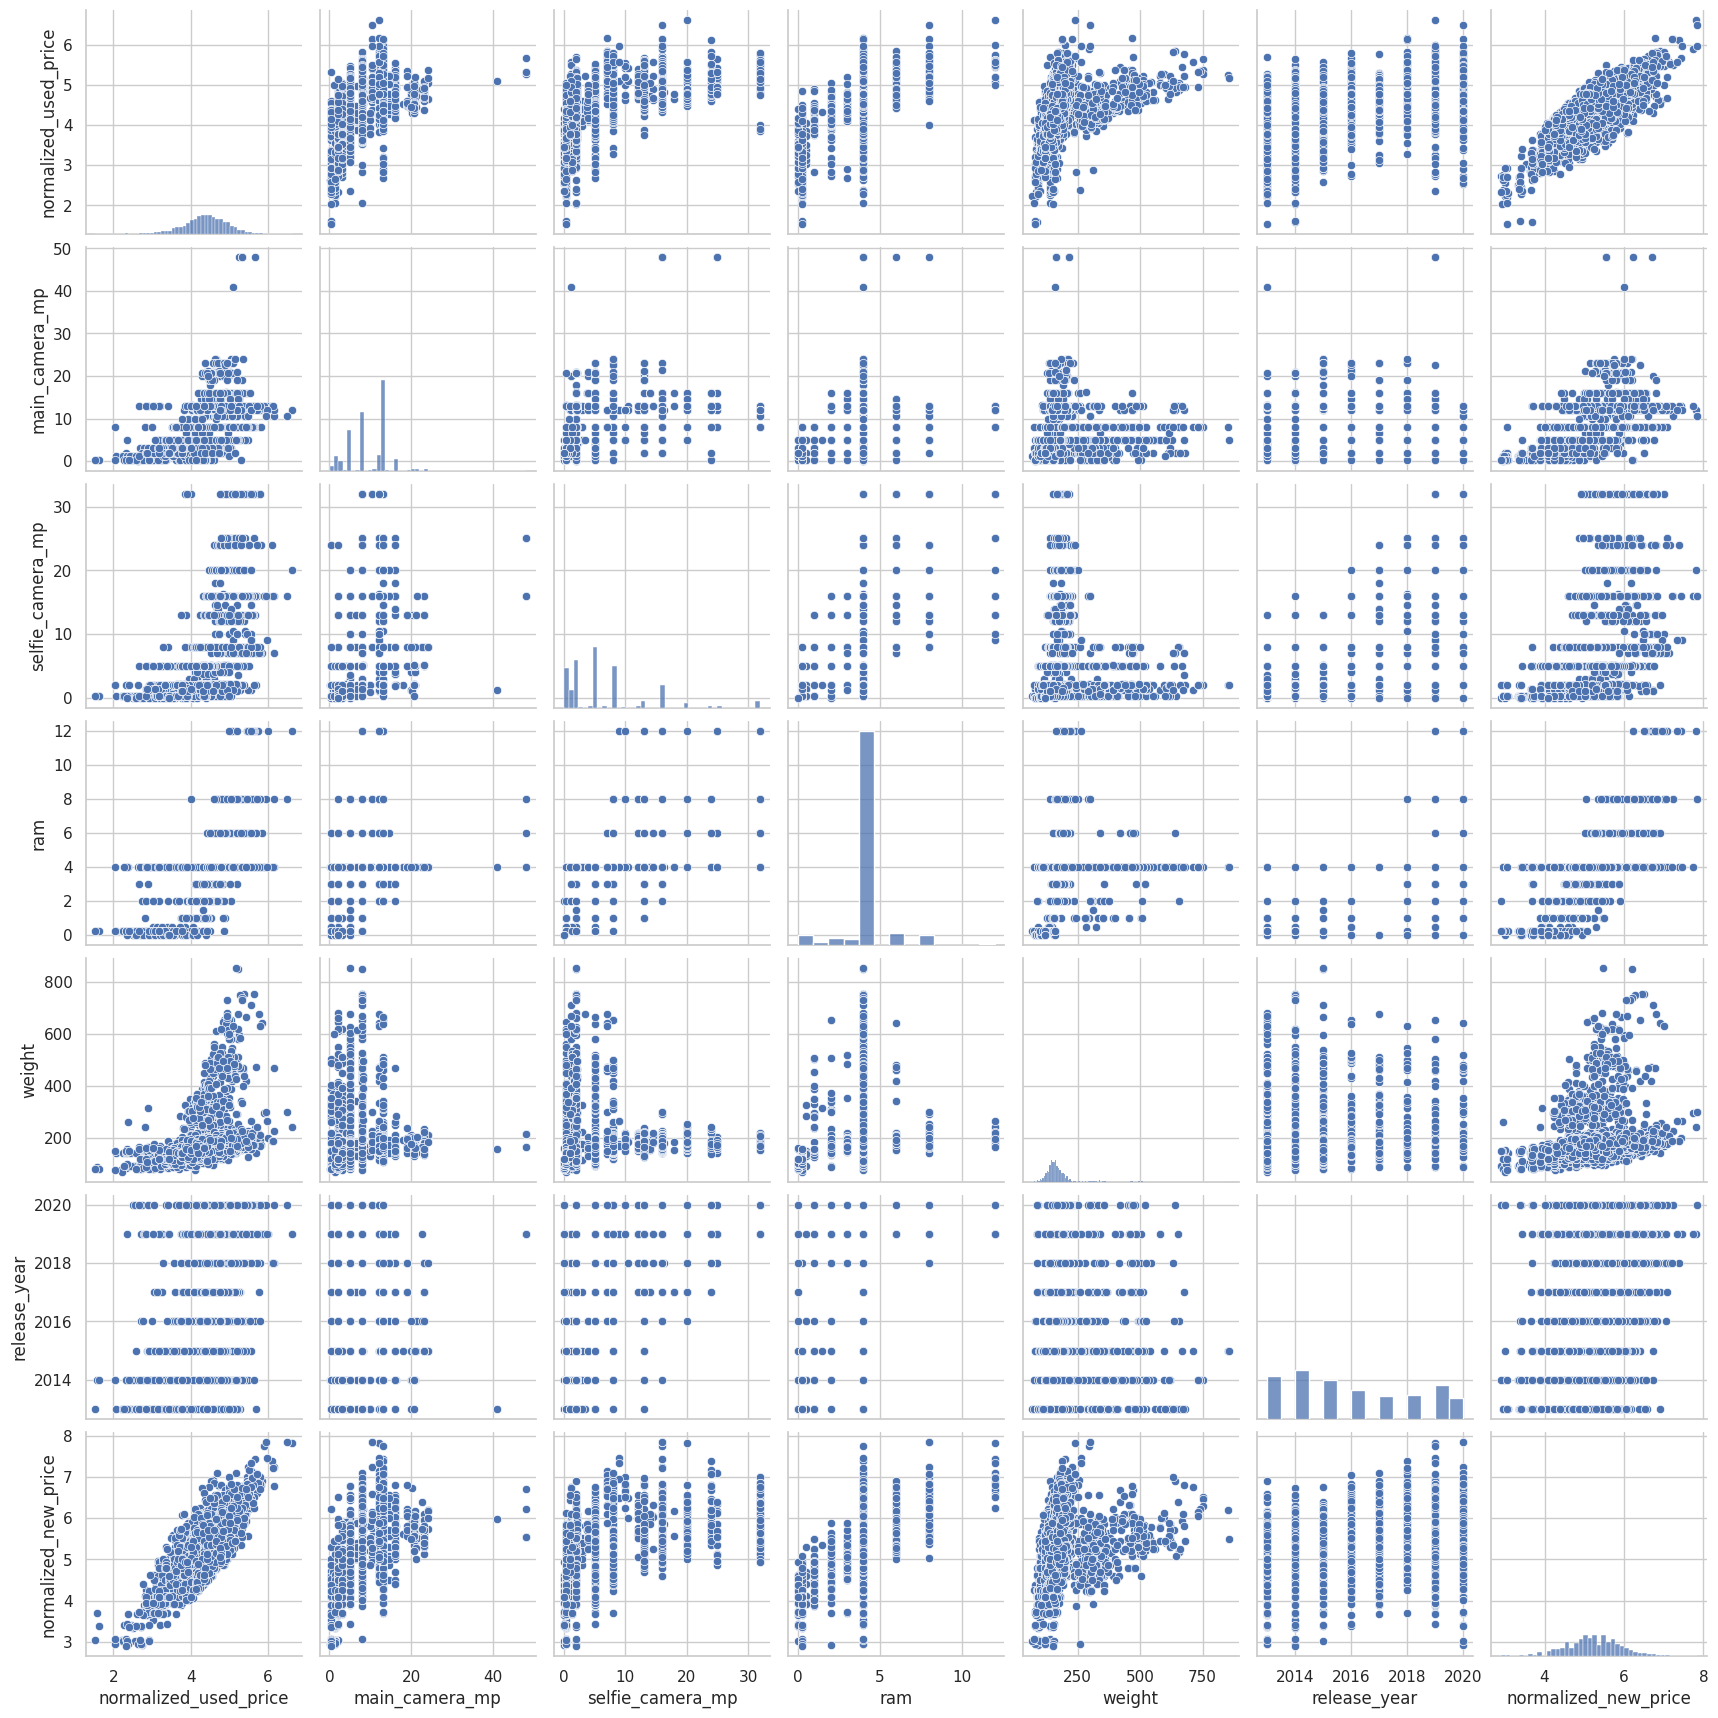

In [ ]:
#@title
# checking the distribution of variables in training set with dependent variable
sns.pairplot(newdf[["normalized_used_price", 'main_camera_mp', 'selfie_camera_mp','ram', 'weight', 'release_year', 'normalized_new_price']])
plt.show()

**Test for Normality**

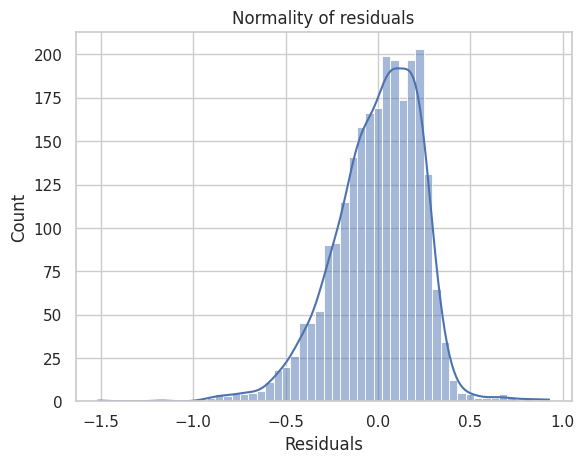

In [ ]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

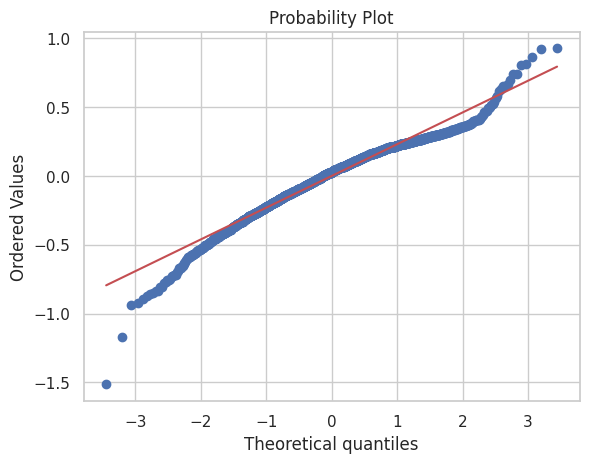

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

The Shapiro-Wilk test can also be used for checking the normality. The null and alternate hypotheses of the test are as follows:

Null hypothesis - Data is normally distributed.
Alternate hypothesis - Data is not normally distributed.

In [ ]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9680168628692627, pvalue=8.993732498487648e-23)

* Since p-value < 0.05, the residuals are not normal as per shapiro test.
* Strictly speaking - the residuals are not normal. However, as an approximation, we might be willing to accept this distribution as close to being normal

### TEST FOR HOMOSCEDASTICITY

The null and alternate hypotheses of the goldfeldquandt test are as follows:

Null hypothesis : Residuals are homoscedastic
Alternate hypothesis : Residuals have hetroscedasticity

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [ ]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0130975791024068), ('p-value', 0.41102022617046063)]

 Since p-value > 0.05 we can say that the residuals are homoscedastic.

## Final Model

### All the assumptions of linear regression are now satisfied. Let's check the summary of our final model (olsres_77).

In [ ]:
print(olsres_77.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1042.
Date:                   Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                           21:24:09   Log-Likelihood:                 77.391
No. Observations:                   2417   AIC:                            -128.8
Df Residuals:                       2404   BIC:                            -53.51
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

### Let's print the linear regression equation.

In [ ]:
# let's check the model parameters
olsres_77.params

const                  -58.521492
main_camera_mp           0.021003
selfie_camera_mp         0.014270
ram                      0.020784
weight                   0.001638
release_year             0.029715
normalized_new_price     0.434801
brand_name_Karbonn       0.121270
brand_name_Lenovo        0.052372
brand_name_Xiaomi        0.088309
os_Others               -0.129343
4g_yes                   0.045565
5g_yes                  -0.060895
dtype: float64

**The equation of the linear regression is written below**

**normalized_used_price = -58.521492 + 0.021003 * ( main_camera_mp ) +  0.0142703 * ( selfie_camera_mp ) +  0.020784 * ( ram ) +  0.001638 * ( weight ) +  0.029715 * ( release_year ) +  0.434801 * ( normalized_new_price ) +  0.121270 * ( brand_name_Karbonn ) +  0.052372 * ( brand_name_Lenovo ) +  0.088309 * ( brand_name_Xiaomi ) +  -0.129343 * ( os_Others ) +  0.045565 * ( 4g_yes ) +  -0.060895 * ( 5g_yes )**

*  A unit increase in the pixels of a phones' main_camera will increase the normalized_used_price by **0.021003** if other independent variables did not change
*  A unit increase in the pixels of a phones' selfie_camera will increase the normalized_used_price by **0.0142703** if other independent variables did not change
*  A unit increase in the byte of a phones' RAM will increase the normalized_used_price by **0.020784** if other independent variables did not change.
*  A unit increase in the gram of a phones' weight will increase the normalized_used_price by **0.001638** if other independent variables did not change and so on and so forth.

### We can now use the model for making predictions on the test data.

In [ ]:
x_train3.columns

Index(['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight',
       'release_year', 'normalized_new_price', 'brand_name_Karbonn',
       'brand_name_Lenovo', 'brand_name_Xiaomi', 'os_Others', '4g_yes',
       '5g_yes'],
      dtype='object')

In [ ]:
X_test.columns

Index(['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp',
       'int_memory', 'ram', 'battery', 'weight', 'release_year', 'days_used',
       'normalized_new_price', 'brand_name_Alcatel', 'brand_name_Apple',
       'brand_name_Asus', 'brand_name_BlackBerry', 'brand_name_Celkon',
       'brand_name_Coolpad', 'brand_name_Gionee', 'brand_name_Google',
       'brand_name_HTC', 'brand_name_Honor', 'brand_name_Huawei',
       'brand_name_Infinix', 'brand_name_Karbonn', 'brand_name_LG',
       'brand_name_Lava', 'brand_name_Lenovo', 'brand_name_Meizu',
       'brand_name_Micromax', 'brand_name_Microsoft', 'brand_name_Motorola',
       'brand_name_Nokia', 'brand_name_OnePlus', 'brand_name_Oppo',
       'brand_name_Others', 'brand_name_Panasonic', 'brand_name_Realme',
       'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Spice',
       'brand_name_Vivo', 'brand_name_XOLO', 'brand_name_Xiaomi',
       'brand_name_ZTE', 'os_Others', 'os_Windows', 'os_iOS', '4g_yes',
       '5g_y

In [ ]:
# dropping columns from the test data that are not there in the training data
X_test2 = X_test.drop(
    ['screen_size', 'int_memory', 'battery', 'days_used', 'brand_name_Alcatel', 'brand_name_Apple', 'brand_name_Asus', 'brand_name_BlackBerry', 'brand_name_Celkon', 'brand_name_Coolpad', 'brand_name_Gionee', 'brand_name_Google', 'brand_name_HTC', 'brand_name_Honor', 'brand_name_Huawei', 'brand_name_Infinix',  'brand_name_LG', 'brand_name_Lava', 'brand_name_Meizu', 'brand_name_Micromax', 'brand_name_Microsoft', 'brand_name_Motorola', 'brand_name_Nokia', 'brand_name_OnePlus', 'brand_name_Oppo', 'brand_name_Others', 'brand_name_Panasonic', 'brand_name_Realme', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Spice', 'brand_name_Vivo', 'brand_name_XOLO', 'brand_name_ZTE', 'os_Windows', 'os_iOS'], axis=1)

In [ ]:
X_test2.columns

Index(['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight',
       'release_year', 'normalized_new_price', 'brand_name_Karbonn',
       'brand_name_Lenovo', 'brand_name_Xiaomi', 'os_Others', '4g_yes',
       '5g_yes'],
      dtype='object')

In [ ]:
# let's make predictions on the test set
y_pred = olsres_77.predict(X_test2)

In [ ]:
# let's check the RMSE on the train data
rmse1 = np.sqrt(mean_squared_error(y_train, df_pred["Fitted Values"]))
rmse1

0.23434566757974892

In [ ]:
# let's check the RMSE on the test data
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
rmse2

0.24161991415091155

In [ ]:
# let's check the MAE on the train data
mae1 = mean_absolute_error(y_train, df_pred["Fitted Values"])
mae1

0.18323972353632167

In [ ]:
# let's check the MAE on the test data
mae2 = mean_absolute_error(y_test, y_pred)
mae2

0.1875354351650924

## Actionable Insights and Recommendations

[link text](https:// [link text](https://))-


**Actionable Insights**


* The training $R^2$ is 0.839, so the model is not underfitting

* The train and test RMSE and MAE are comparable, so the model is not overfitting either
* We can see that RMSE on the train and test sets are comparable. So, our model is not suffering from overfitting.
* MAE indicates that our current model is able to predict normalized_used_price within a mean error of 0.19 units on the test data.
* Hence, we can conclude the model "ols_res77" is good for prediction as well as inference purposes.


___

**Recommendations**

*  Factors such as main camera pixels, selfie camera pixels, ram, weight, release year, normalized new price, Karbon brand, Lenovo brand, Xiaomi,Other Operating systems, 4g and 5g availability can affect the price of used/refurbished devices. Therefore the Recell company should look at these factors while trying to make decision on the price of used phones.
*  The Normalized new price has the greatest impact on the normalized used price with a coefficiient oof 0.43. Therefore Recell should always look at the price of the new device in the market to determine the price of used devices.


